In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Process each line into a structured format
def process_tidal_data(raw_data, month):
    data = []
    for line in raw_data:
        entries = line.split()
        # Separate day and its times & heights
        for i in range(0, len(entries), 3):
            if len(entries) - i >= 3:
                date = entries[i]
                time = entries[i + 1]
                height = entries[i + 2]
                data.append({"Date": date, "Time": time, "Height": height})
    
    df = pd.DataFrame(data)
    df['Height'] = df['Height'].astype(float) - 0.87
    df['Date'] = pd.to_datetime(df['Date']+str(month) + str(2024) + ' ' + df['Time'], format='%d%m%Y %H:%M', errors='coerce')
    df.drop(columns=['Time'], inplace=True)
    df.sort_values(by='Date', inplace=True)
    df.rename(columns={'Date': 'Date and Time'}, inplace=True)
    return df

In [13]:
# Read the raw data from the text file
with open(r"data\predicition_UHSLC_september.txt", "r") as file:
    raw_data_sept = file.readlines()
    
with open(r"data\prediction_UHSLC_october.txt", "r") as file:
    raw_data_oct = file.readlines()

df_september = process_tidal_data(raw_data_sept, 9)
df_october = process_tidal_data(raw_data_oct, 10)

combined_df = pd.concat([df_september, df_october], ignore_index=True)

combined_df.to_csv("export/tidal_prediction.csv", index=False)
print("Data has been exported as tidal_data.csv.")

Data has been exported as tidal_data.csv.


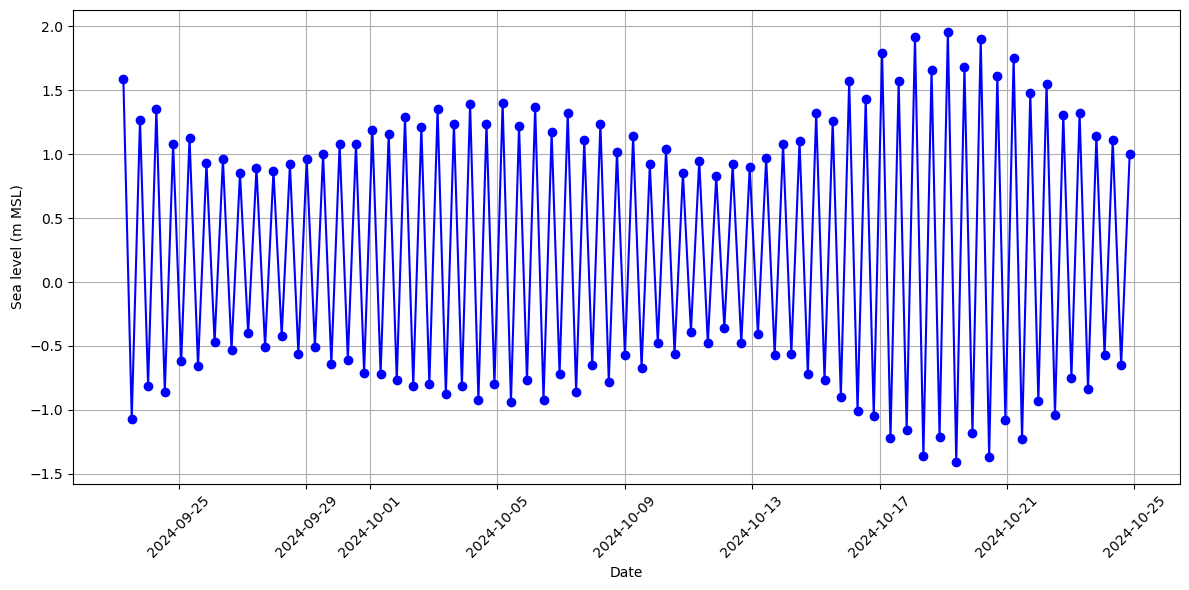

In [14]:
start_date = '2024-09-23'
end_date = '2024-10-25'

filtered_df = combined_df[(combined_df['Date and Time'] >= start_date) & (combined_df['Date and Time'] <= end_date)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date and Time'], filtered_df['Height'].astype(float), marker='o', linestyle='-', color='b')

# plt.title('Predicted Tide in Quepos from September 23 to October 25, 2024')
plt.xlabel('Date')
plt.ylabel('Sea level (m MSL)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid()
plt.tight_layout()
plt.savefig('export/tide_prediction.png')